In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar los datos procesados
df = pd.read_csv("../data/processed/reclamos_clean.csv")

C:\Users\harol\AppData\Local\Temp\ipykernel_24584\2449691636.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/reclamos_clean.csv")


In [4]:
# Convertir fechas
df['FE_PRESEN_RECLA'] = pd.to_datetime(df['FE_PRESEN_RECLA'])
df['FE_RESULT_RECL'] = pd.to_datetime(df['FE_RESULT_RECL'])

In [5]:
# Ver primeras filas
df.head()

,ID_PERIODO,DE_TIPO_ADMINISTRADO,CO_ADMIN_DECLA,CO_UGIPRESS,DE_TIPO_INSTITUCION,CO_ADMIN_SUCE,DE_MEDIO_PRESENTACION,CO_UNICO_RECLAMO,DE_MEDIO_RECEPCION,FE_PRESEN_RECLA,...,DE_ETAPA_RECLAMO,DE_TIPO_ADMIN_DERIVA,CO_ADMIN_DERIVA,DE_RESULTADO,DE_MOTIVO_CONCL_ANTIC,FE_RESULT_RECL,DE_COMUN_RESULT,FE_NOTIFI_RESULT,AÑO,MES
0,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-352,Libro de Reclamaciones Físico,2020-11-27,...,Resultado y Notificación,-,-,Infundado,-,2020-12-21,Correo electrónico,NaN,2020,11
1,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-360,Libro de Reclamaciones Físico,2021-01-04,...,Resultado y Notificación,-,-,Infundado,-,2021-02-18,Correo electrónico,NaN,2021,1
2,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-361,Libro de Reclamaciones Físico,2021-01-06,...,Archivo y Custodia del Expediente,-,-,Infundado,-,2021-01-20,Correo electrónico,20210122.0,2021,1
3,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-364,Libro de Reclamaciones Físico,2021-01-06,...,Archivo y Custodia del Expediente,-,-,Infundado,-,2021-01-25,Correo electrónico,20210204.0,2021,1
4,202101,IAFAS,20007,20007,IAFAS,20007,Físico,20007-365,Libro de Reclamaciones Físico,2021-01-08,...,Evaluación e investigación,-,-,Pendiente,-,NaT,-,NaN,2021,1


C:\Users\harol\AppData\Local\Temp\ipykernel_24584\4021634294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["AÑO"], palette="viridis")


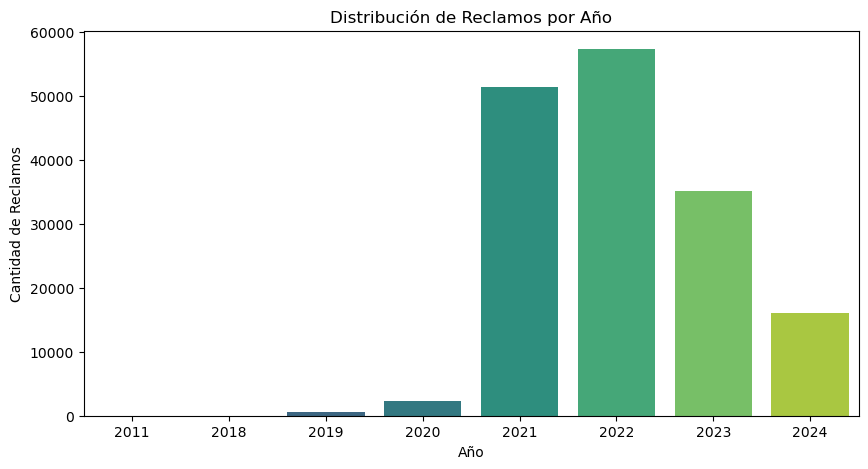

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["AÑO"], palette="viridis")
plt.title("Distribución de Reclamos por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Reclamos")
plt.show()

C:\Users\harol\AppData\Local\Temp\ipykernel_24584\1122277882.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["MES"], palette="coolwarm")


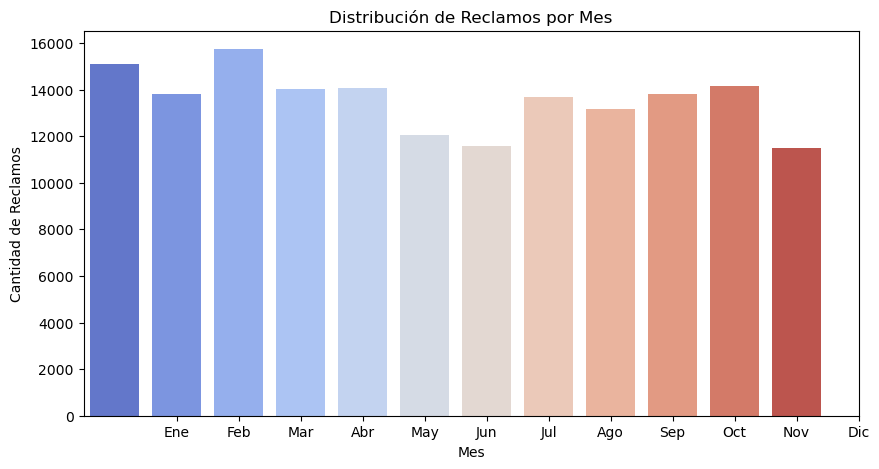

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["MES"], palette="coolwarm")
plt.title("Distribución de Reclamos por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Reclamos")
plt.xticks(range(1,13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.show()

C:\Users\harol\AppData\Local\Temp\ipykernel_24584\3965622479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["DE_ESTADO_RECLAMO"], order=df["DE_ESTADO_RECLAMO"].value_counts().index, palette="Blues_r")


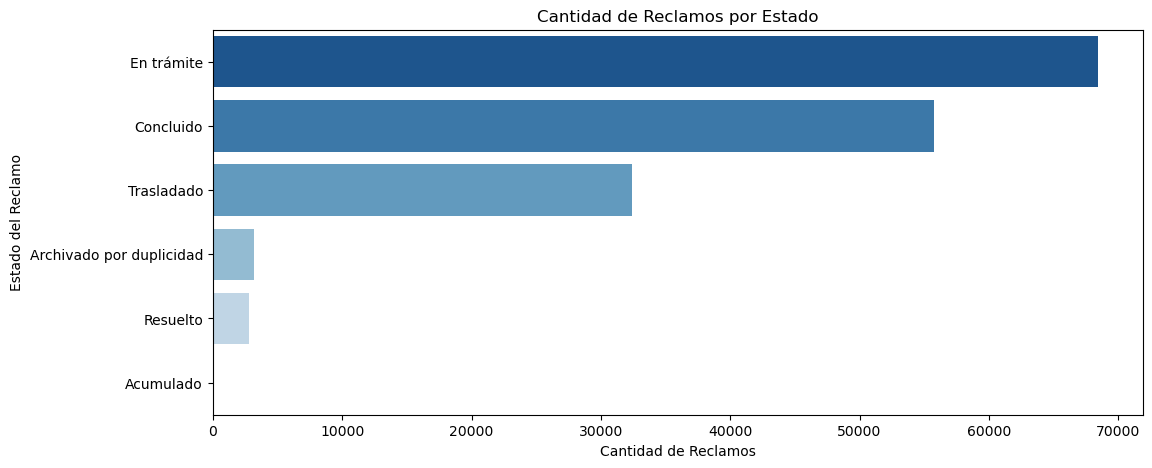

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(y=df["DE_ESTADO_RECLAMO"], order=df["DE_ESTADO_RECLAMO"].value_counts().index, palette="Blues_r")
plt.title("Cantidad de Reclamos por Estado")
plt.xlabel("Cantidad de Reclamos")
plt.ylabel("Estado del Reclamo")
plt.show()

C:\Users\harol\AppData\Local\Temp\ipykernel_24584\268340002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["DE_MEDIO_PRESENTACION"], order=df["DE_MEDIO_PRESENTACION"].value_counts().index, palette="Reds_r")


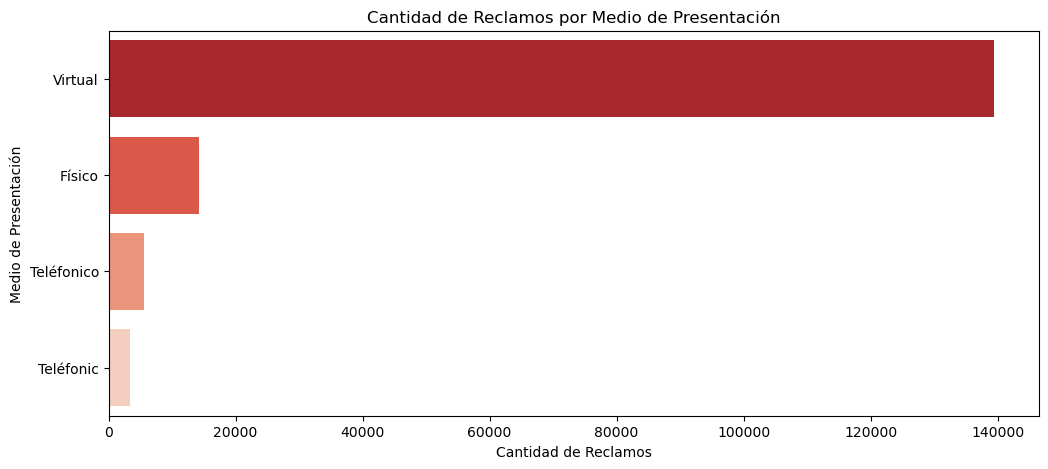

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(y=df["DE_MEDIO_PRESENTACION"], order=df["DE_MEDIO_PRESENTACION"].value_counts().index, palette="Reds_r")
plt.title("Cantidad de Reclamos por Medio de Presentación")
plt.xlabel("Cantidad de Reclamos")
plt.ylabel("Medio de Presentación")
plt.show()

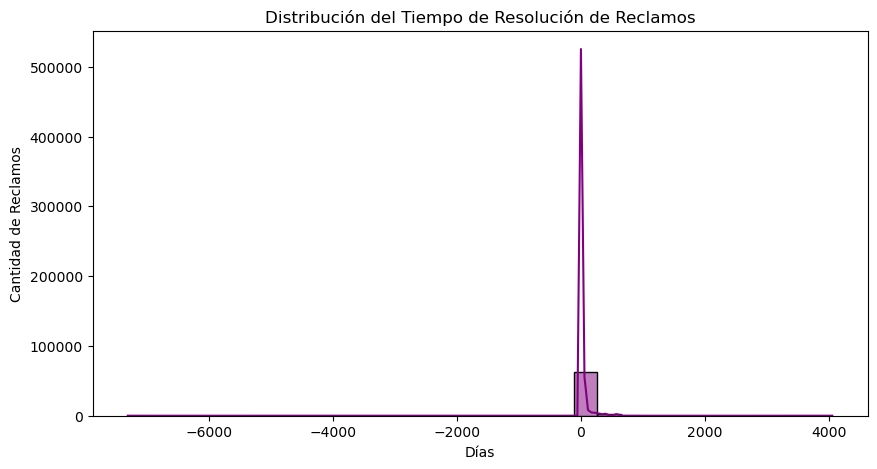

In [10]:
df["TIEMPO_RESOLUCION"] = (df["FE_RESULT_RECL"] - df["FE_PRESEN_RECLA"]).dt.days

plt.figure(figsize=(10,5))
sns.histplot(df["TIEMPO_RESOLUCION"].dropna(), bins=30, kde=True, color="purple")
plt.title("Distribución del Tiempo de Resolución de Reclamos")
plt.xlabel("Días")
plt.ylabel("Cantidad de Reclamos")
plt.show()